Run the notebook and compare the last two plots to observe the blocking effect compared to a control group

In [147]:
import numpy as np
import matplotlib.pyplot as plt

Represent US and CS with classes that can hold variables

In [148]:
class CS():
    def __init__(self,alpha):
        self.alpha=alpha
        self.Vtotal=0
        self.Vhist=[0]

In [149]:
class US():
    def __init__(self, beta, asymtote):
        self.beta=beta
        self.asymtote=asymtote

Instantiate objects for blocking experiment

In [150]:
a=CS(0.2)
b=CS(0.2)
c=CS(0.2)
us_plus=US(0.5, 1)
us_minus=US(0.45, 0)

Recorla Wagner update function

In [151]:
def rw(n_trials, *args):
    args=list(args)
    
    #create a compound cue is there is more than one cs
    if len(args[:-1])>1:
        compound_alpha=0
        Vtotal=0
        for elem in args[:-1]:
            compound_alpha+=elem.alpha
            Vtotal+=elem.Vtotal
        compound=CS(compound_alpha)
        compound.Vtotal=Vtotal
        compound.Vhist[0]=Vtotal
        
    #define the US for the function
    US=args[-1]

    if len(args[:-1])==1:
        for trial in range(n_trials-1):#results are appended to initial zero value which is the first trial
            args[:-1][0].Vtotal+=args[:-1][0].alpha*US.beta*(US.asymtote-args[:-1][0].Vtotal)
            args[:-1][0].Vhist.append(args[:-1][0].Vtotal)                                     
        
        return args[:-1][0].Vhist
        
    elif len(args[:-1])==2:
        for trial in range(n_trials-1):
            args[:-1][0].Vtotal+=args[:-1][0].alpha*US.beta*(US.asymtote-args[:-1][0].Vtotal-args[:-1][1].Vtotal)
            args[:-1][1].Vtotal+=args[:-1][1].alpha*US.beta*(US.asymtote-args[:-1][0].Vtotal-args[:-1][1].Vtotal)
            args[:-1][0].Vhist.append(args[:-1][0].Vtotal)
            args[:-1][1].Vhist.append(args[:-1][1].Vtotal)
    
        #calculate Vhist for compound
        if len(args[:-1])>1:
            for trial in range(n_trials-1):
                compound.Vtotal+=compound.alpha*US.beta*(US.asymtote-compound.Vtotal)
                compound.Vhist.append(compound.Vtotal)
        return args[:-1][0].Vhist, args[:-1][1].Vhist, compound.Vhist
        
    
    elif len(args[:-1])==3:
        for trial in range(n_trials-1):
          
            args[:-1][0].Vtotal+=args[:-1][0].alpha*US.beta*(US.asymtote-args[:-1][0].Vtotal-args[:-1][1].Vtotal-args[:-1][2].Vtotal)
            args[:-1][1].Vtotal+=args[:-1][1].alpha*US.beta*(US.asymtote-args[:-1][0].Vtotal-args[:-1][1].Vtotal-args[:-1][2].Vtotal)
            args[:-1][2].Vtotal+=args[:-1][2].alpha*US.beta*(US.asymtote-args[:-1][0].Vtotal-args[:-1][1].Vtotal-args[:-1][2].Vtotal)
            args[:-1][0].Vhist.append(args[:-1][0].Vtotal)
            args[:-1][1].Vhist.append(args[:-1][1].Vtotal)
            args[:-1][2].Vhist.append(args[:-1][2].Vtotal)                                     
    
        #calculate Vhist for compound
        if len(args[:-1])>1:
            for trial in range(n_trials-1):
                compound.Vtotal+=compound.alpha*US.beta*(US.asymtote-compound.Vtotal)
                compound.Vhist.append(compound.Vtotal)
   
        return args[:-1][0].Vhist, args[:-1][1].Vhist, args[:-1][2].Vhist, compound.Vhist

Run phase 1

In [152]:
aV = rw(20, a, us_plus)

Plot and print the results

A= [None, 0, 0.1, 0.19, 0.271, 0.34390000000000004, 0.40951000000000004, 0.46855900000000006, 0.5217031000000001, 0.5695327900000001, 0.6125795110000001, 0.6513215599000001, 0.68618940391, 0.717570463519, 0.7458134171671, 0.7712320754503901, 0.7941088679053511, 0.814697981114816, 0.8332281830033343, 0.8499053647030009, 0.8649148282327008]


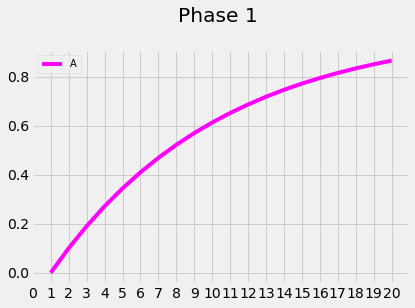

In [153]:
plt.style.use('fivethirtyeight')
aV.insert(0,None)
plt.plot(aV, label='A', color='magenta')
plt.xticks(range(len(aV)))
plt.xlim(left=0)
plt.legend(prop={'size': 10})
plt.title('Phase 1 \n')
print('A=', aV)

Run phase 2

In [154]:
aV, bV, abV = rw(20, a, b, us_plus)

In [155]:
#slice the values for A so as to only include phase 2
aV=aV[19:]

Plot and print the phase 2 results

A= [None, 0.8499053647030009, 0.8649148282327008, 0.8784233454094308, 0.889365244322582, 0.8982281824422345, 0.905407162319153, 0.911222136019457, 0.9159322647167033, 0.9197474689614727, 0.922837784399736, 0.9253409399047292, 0.9273684958637738, 0.9290108161905999, 0.930341095655329, 0.9314186220217595, 0.9322914183785683, 0.9329983834275835, 0.9335710251172857, 0.9340348648859446, 0.9344105750985582]
B= [None, 0, 0.012157665459056922, 0.022005374480893028, 0.02998201878858028, 0.036443100677806956, 0.041676577008080556, 0.04591569283560217, 0.04934937665589468, 0.052130660550331616, 0.05438350050482553, 0.0562083008679656, 0.05768638916210905, 0.05888364068036525, 0.059853414410152773, 0.06063893113128066, 0.06127519967539425, 0.06179057719612625, 0.06220803298791917, 0.06254617217927144, 0.06282006492426678]
C= [None, 0.8649148282327008, 0.8919318625861606, 0.9135454900689285, 0.9308363920551428, 0.9446691136441142, 0.9557352909152914, 0.9645882327322332, 0.9716705861857865, 0.977336

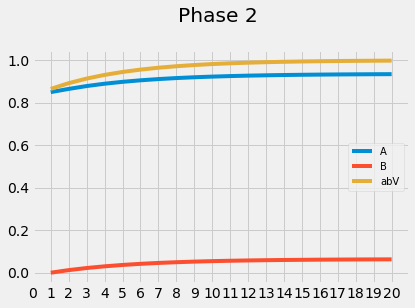

In [156]:
bV.insert(0,None)
abV.insert(0,None)
aV.insert(0,None)
aV=aV[:-1]
plt.plot(aV, label='A')
plt.plot(bV, label='B')
plt.plot(abV, label='abV')
plt.xticks(range(len(aV)))
plt.legend(prop={'size': 10})
plt.title('Phase 2 \n')
print('A=', aV)
print('B=', bV)
print('C=', abV)

Run phase 3

In [157]:
bV = rw(2, b, us_minus)

In [158]:
# save bV to plot against Ctrl later
together_bV=bV
#slice the values for B so as to only include phase 2
bV=bV[19:]

Plot and print phase 3 results

B= [None, 0.06282006492426678, 0.05716625908108277]


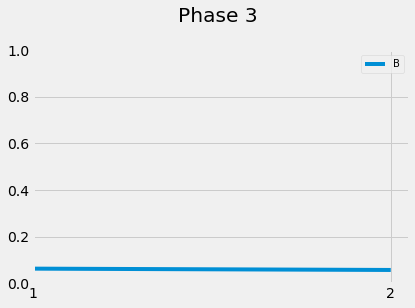

In [159]:
bV[0]=None
plt.plot(bV, label='B')
plt.legend(prop={'size': 10})
plt.xticks(range(len(bV)))
plt.title('Phase 3 \n')
plt.xlim(left=1)
plt.ylim(top=1)
plt.ylim(bottom=0)
print('B=', bV)

Run the simulator again for phases 2 and 3 on the control group

In [160]:
#reinstantiate a and b first (it's a different group)
a=CS(0.2)
b=CS(0.2)
ctrl_cV = rw(20, c, us_plus) # phase 1 for ctrl group c stimulus
ctrl_aV, ctrl_bV, ctrl_abV = rw(20, a, b, us_plus)

In [161]:
#slice the results
ctrl_aV = ctrl_aV[19:]

Plot and print the Ctrl results after phase 2

Ctrl A= [None, 0.5167115770361048]
Ctrl B= [None, 0, 0.09000000000000001, 0.16290000000000002, 0.221949, 0.26977869, 0.3085207389, 0.339901798509, 0.36532045679228997, 0.38590957000175485, 0.40258675170142144, 0.41609526887815135, 0.4270371677913026, 0.43590010591095507, 0.4430790857878736, 0.4488940594881776, 0.45360418818542386, 0.4574193924301933, 0.4605097078684566, 0.4630128633734498, 0.46504041933249435]
Ctrl AB= [None, 0, 0.2, 0.36000000000000004, 0.488, 0.5904, 0.67232, 0.7378560000000001, 0.7902848, 0.83222784, 0.865782272, 0.8926258176, 0.9141006540800001, 0.931280523264, 0.9450244186112, 0.95601953488896, 0.9648156279111679, 0.9718525023289344, 0.9774820018631475, 0.981985601490518, 0.9855884811924144]


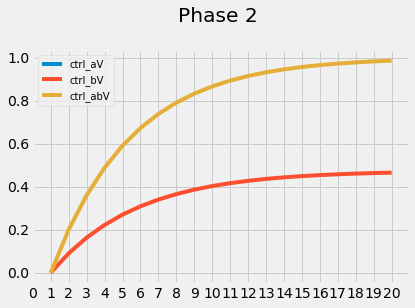

In [162]:
ctrl_aV.insert(0,None)
ctrl_bV.insert(0,None)
ctrl_abV.insert(0,None)
plt.plot(ctrl_aV, label='ctrl_aV')
plt.plot(ctrl_bV, label='ctrl_bV')
plt.plot(ctrl_abV, label='ctrl_abV')
plt.xticks(range(len(aV)))
plt.legend(prop={'size': 10})
plt.title('Phase 2 \n')
print('Ctrl A=',ctrl_aV)
print('Ctrl B=',ctrl_bV)
print('Ctrl AB=',ctrl_abV)

Run and plot the results for control group in phase 3

Text(0.5, 0, 'Trials')

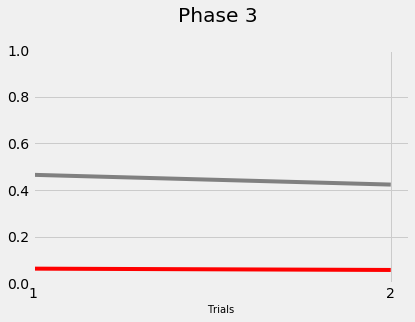

In [163]:
together_ctrl_bV=ctrl_bV
ctrl_bV = rw(2, b, us_minus)
ctrl_bV=ctrl_bV[19:]
ctrl_bV[0]=None
plt.plot(ctrl_bV, label='Ctrl  B', color='grey')
plt.plot(bV, label='Blk B', color='red')
plt.xticks(range(len(ctrl_bV)))
plt.title('Phase 3 \n')
plt.xlim(left=1)
plt.ylim(top=1)
plt.ylim(bottom=0)
plt.xlabel('Trials', size=10)

Reproduce the phase 2 plot with the blocking and control groups superimposed

Text(0.5, 0, 'Trials')

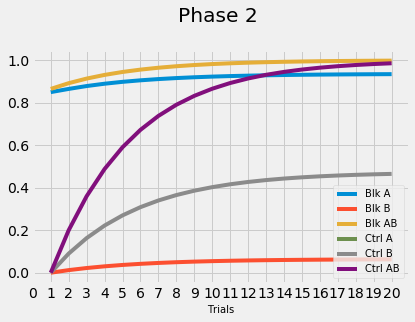

In [164]:
plt.plot(aV, label='Blk A')
plt.plot(together_bV[:(len(together_bV)-1)], label='Blk B')
plt.plot(abV, label='Blk AB')
plt.plot(ctrl_aV, label='Ctrl A')
plt.plot(together_ctrl_bV[:(len(together_ctrl_bV)-1)], label='Ctrl B')
plt.plot(ctrl_abV, label='Ctrl AB')
plt.xticks(range(len(aV)))
plt.legend(prop={'size': 10})
plt.title('Phase 2 \n')
plt.xlabel('Trials', size=10)